In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
data = pd.read_csv('4-wheeler-EV-carwale.csv')

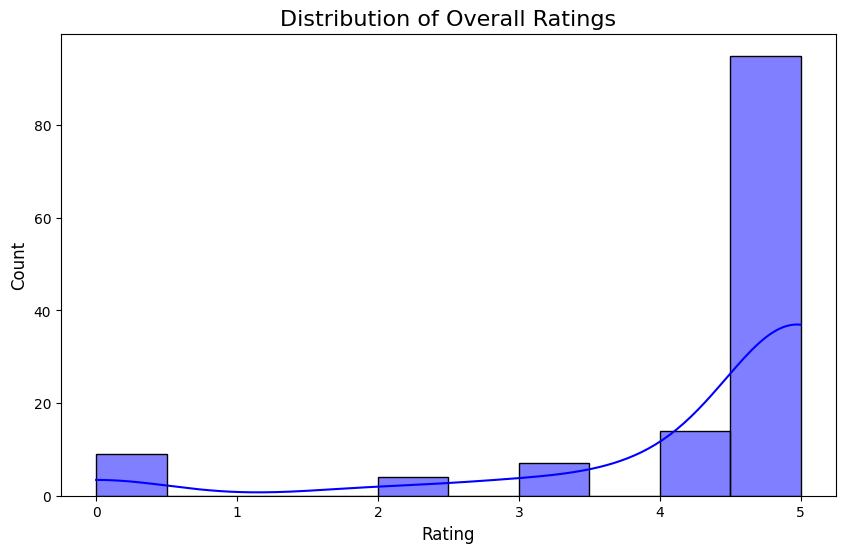

In [3]:
# EDA: Visualize ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

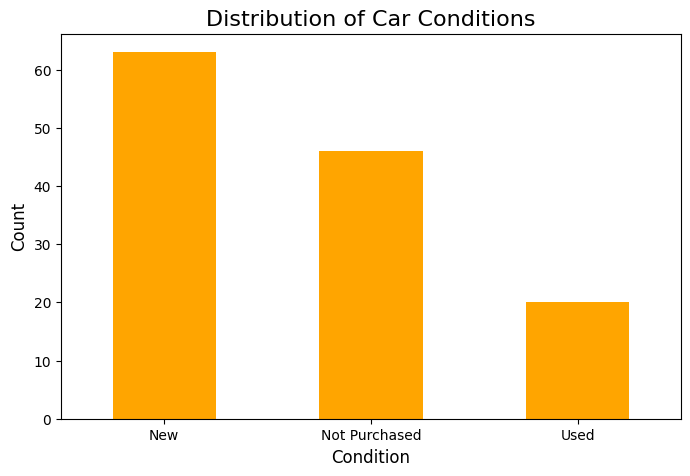

In [4]:
# EDA: Condition Distribution
condition_counts = data['Condition'].value_counts()
plt.figure(figsize=(8, 5))
condition_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Car Conditions', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [5]:
# Preprocessing: Clean text data
basic_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she",
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of",
    "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s",
    "t", "can", "will", "just", "don", "should", "now"
])

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)     # Remove numbers
    text = text.lower()                 # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in basic_stopwords])  # Remove stopwords
    return text

data['cleaned_review'] = data['review'].apply(clean_text)


In [6]:
# Convert ratings to sentiment categories
def categorize_sentiment(rating):
    if rating > 3:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = data['rating'].apply(categorize_sentiment)


In [7]:
sub_categories = ['Exterior','Comfort','Performance','Fuel Economy', 'Value for Money']

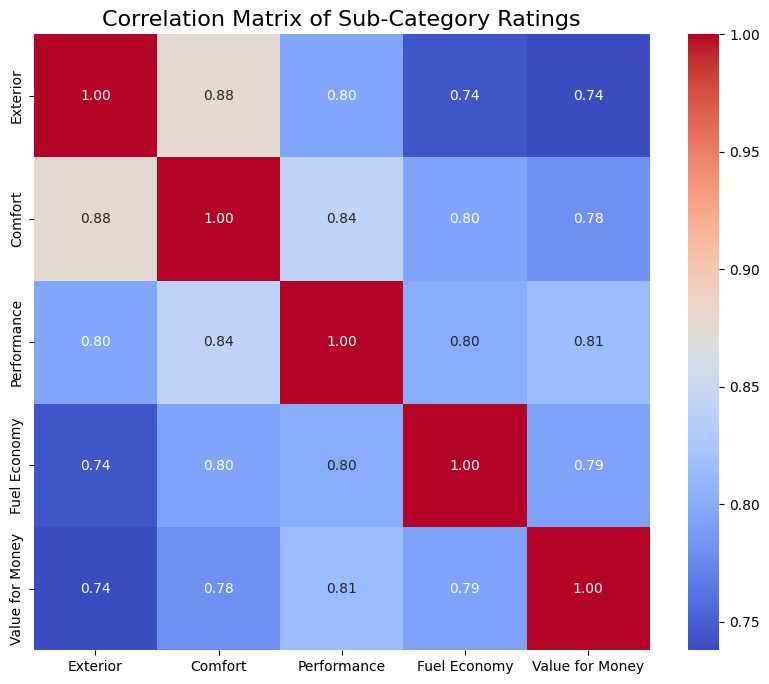

In [8]:
# 4. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data[sub_categories].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Sub-Category Ratings', fontsize=16)
plt.show()

 **Correlation Matrix**:
   - Displays the relationship between sub-category ratings.
   - Strong correlations suggest that improvements in one area (e.g., `Comfort`) might positively influence others (e.g., `Performance`).

In [9]:
# Encode sentiment labels
label_encoder = LabelEncoder()
data['sentiment_label'] = label_encoder.fit_transform(data['sentiment'])

In [10]:
# Split data into train and test sets
X = data['cleaned_review']
y = data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [13]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8461538461538461

Confusion Matrix:
 [[ 0  0  3]
 [ 0  0  1]
 [ 0  0 22]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         1
    positive       0.85      1.00      0.92        22

    accuracy                           0.85        26
   macro avg       0.28      0.33      0.31        26
weighted avg       0.72      0.85      0.78        26



In [16]:
pip install imbalanced-learn


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_tfidf_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Train a Random Forest model on balanced data
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_tfidf_balanced, y_train_balanced)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_)

results_summary = f"Model Accuracy: {accuracy_rf:.2f}\n"
results_summary += "\nConfusion Matrix:\n"
conf_matrix_rf_df = pd.DataFrame(
    conf_matrix_rf,
    index=["True Negative", "True Neutral", "True Positive"],
    columns=["Predicted Negative", "Predicted Neutral", "Predicted Positive"]
)
results_summary += conf_matrix_rf_df.to_string() + "\n"
results_summary += "\nClassification Report:\n" + class_report_rf

print(results_summary)


Model Accuracy: 0.85

Confusion Matrix:
               Predicted Negative  Predicted Neutral  Predicted Positive
True Negative                   0                  0                   3
True Neutral                    0                  0                   1
True Positive                   0                  0                  22

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         1
    positive       0.85      1.00      0.92        22

    accuracy                           0.85        26
   macro avg       0.28      0.33      0.31        26
weighted avg       0.72      0.85      0.78        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.ensemble import GradientBoostingClassifier


# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_)


results_summary_gb = f"Gradient Boosting Model Accuracy: {accuracy_gb:.2f}\n"
results_summary_gb += "\nConfusion Matrix:\n"
conf_matrix_gb_df = pd.DataFrame(
    conf_matrix_gb,
    index=["True Negative", "True Neutral", "True Positive"],
    columns=["Predicted Negative", "Predicted Neutral", "Predicted Positive"]
)
results_summary_gb += conf_matrix_gb_df.to_string() + "\n"
results_summary_gb += "\nClassification Report:\n" + class_report_gb

print(results_summary_gb)


Gradient Boosting Model Accuracy: 0.81

Confusion Matrix:
               Predicted Negative  Predicted Neutral  Predicted Positive
True Negative                   0                  1                   2
True Neutral                    0                  0                   1
True Positive                   1                  0                  21

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         1
    positive       0.88      0.95      0.91        22

    accuracy                           0.81        26
   macro avg       0.29      0.32      0.30        26
weighted avg       0.74      0.81      0.77        26



In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report

# Tokenize and pad sequences
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum length of each review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Define the LSTM model
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Output layer for 3 sentiment classes
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(
    X_train_padded, y_train_cat,
    validation_data=(X_test_padded, y_test_cat),
    epochs=10, batch_size=32, verbose=2
)

# Evaluate the model
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm_classes, target_names=label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
4/4 - 16s - 4s/step - accuracy: 0.7184 - loss: 0.9848 - val_accuracy: 0.8462 - val_loss: 0.7055
Epoch 2/10
4/4 - 0s - 24ms/step - accuracy: 0.8447 - loss: 0.6486 - val_accuracy: 0.8462 - val_loss: 0.5248
Epoch 3/10
4/4 - 0s - 24ms/step - accuracy: 0.8447 - loss: 0.5357 - val_accuracy: 0.8462 - val_loss: 0.5614
Epoch 4/10
4/4 - 0s - 22ms/step - accuracy: 0.8447 - loss: 0.5855 - val_accuracy: 0.8462 - val_loss: 0.5604
Epoch 5/10
4/4 - 0s - 35ms/step - accuracy: 0.8447 - loss: 0.5944 - val_accuracy: 0.8462 - val_loss: 0.5417
Epoch 6/10
4/4 - 0s - 34ms/step - accuracy: 0.8447 - loss: 0.5721 - val_accuracy: 0.8462 - val_loss: 0.5301
Epoch 7/10
4/4 - 0s - 34ms/step - accuracy: 0.8447 - loss: 0.5545 - val_accuracy: 0.8462 - val_loss: 0.5242
Epoch 8/10
4/4 - 0s - 26ms/step - accuracy: 0.8447 - loss: 0.5490 - val_accuracy: 0.8462 - val_loss: 0.5237
Epoch 9/10
4/4 - 0s - 24ms/step - accuracy: 0.8544 - loss: 0.5170 - val_accuracy: 0.8462 - val_loss: 0.5244
Epoch 10/10
4/4 - 0s - 34ms/s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-20-8f3cae197294>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')


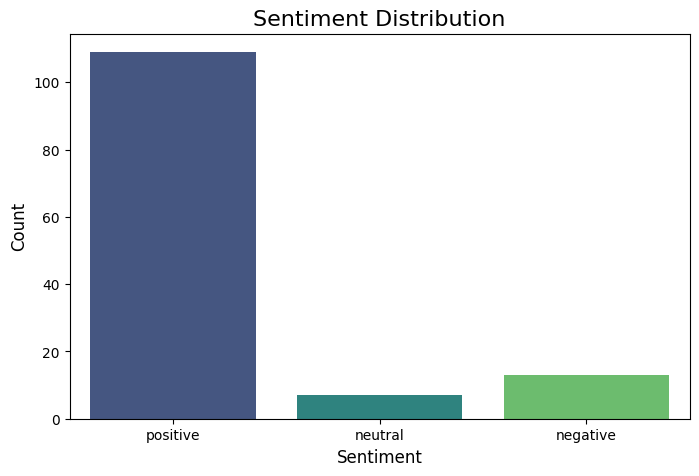

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='viridis')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


 **Sentiment Distribution**:
   - The majority of reviews are positive, followed by a small proportion of neutral and negative sentiments

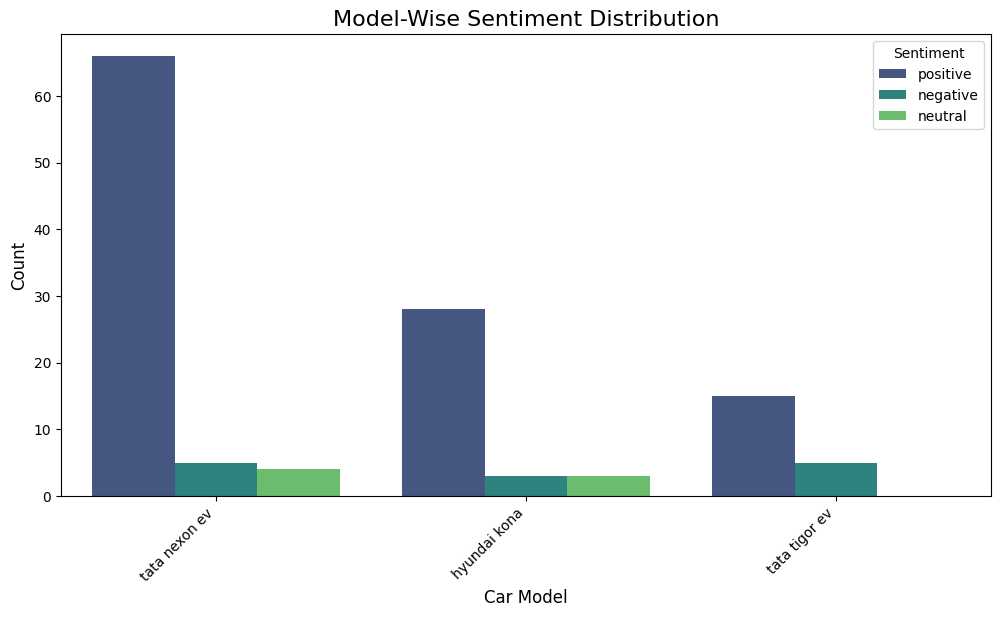

In [21]:
# Model-Wise Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='model_name', hue='sentiment', order=data['model_name'].value_counts().index, palette='viridis')
plt.title('Model-Wise Sentiment Distribution', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

 **Model-Wise Sentiment Distribution**:
   - Certain car models have predominantly positive reviews, while others show a mix of sentiments.
   - Helps identify models that are well-received or need improvement.




### Conclusions from the Analysis


1. **General Sentiment**:
   - A majority of reviews expressed **positive sentiments** about electric vehicles (EVs), suggesting overall consumer satisfaction.

2. **Parameters Influencing Consumer Perception**:
   - **Performance and Comfort**: These parameters received the highest average ratings, indicating that consumers value smooth driving experiences and vehicle comfort.
   - **Value for Money and Fuel Economy**: These categories had relatively lower ratings, suggesting that concerns about pricing and operational cost efficiency persist among EV consumers.

3. **Frequent Themes in Sentiments**:
   - **Environmental Concerns**: Positive reviews frequently cited the eco-friendly nature of EVs, showing that sustainability is a key driver for adoption.
   - **Charging Infrastructure**: Negative reviews often mentioned issues with charging facilities, pointing to a significant barrier to adoption.
   - **Price Sensitivity**: Neutral and negative sentiments highlighted the higher initial cost of EVs as a critical deterrent for many potential buyers.

4. **Trends by Models**:
   - Certain EV models consistently received positive sentiments, showing that brand reputation and specific features can drive consumer satisfaction.
   - Models with mixed reviews revealed concerns about reliability, charging support, or pricing.

#### Broader Implications
- **Adoption Barriers**:
  - The need for improved charging infrastructure is a recurring theme that companies and policymakers must address to encourage EV adoption.
  - Price concerns highlight the importance of subsidies, incentives, or lower-cost models to appeal to price-sensitive consumers.

- **Decision-Making Factors**:
  - Positive sentiments around comfort and performance demonstrate that technical advancements and user experience play a vital role in decision-making.
  - Environmental benefits resonate strongly with consumers, indicating an opportunity to further market the eco-friendly advantages of EVs.

- **Opportunities for Improvement**:
  - Brands should focus on reducing costs and improving perceived value for money while ensuring adequate support for charging facilities.
  - Addressing the specific concerns raised in neutral and negative reviews can help convert hesitant buyers into advocates for EV adoption.


### Final conclusion:
This study illustrates that while consumers express strong satisfaction with EVs in terms of comfort, performance, and environmental benefits, barriers like charging infrastructure and pricing remain pivotal in their decision-making process. Addressing these concerns could significantly accelerate EV adoption.